<a href="https://colab.research.google.com/github/bilalProgTech/mtech-nmims/blob/master/speech-recognition/Lab-Work/20220918-Lab-8-MTech-AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'
!kaggle datasets download -d sourabhy/hindi-speech-recognition
!unzip hindi-speech-recognition.zip

In [ ]:
!pip install SpeechRecognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 32.8 MB 1.3 MB/s 


In [ ]:
import speech_recognition as sr

In [ ]:
path = '/content/test/audio/0116_003.wav'

In [ ]:
r = sr.Recognizer()

In [ ]:
sample_audio = sr.AudioFile(path)
with sample_audio as source:
    audio = r.record(source) #duration

In [ ]:
hindi_text = r.recognize_google(audio, language='hi-IN')
hindi_text

'और अपने पेट को मां की स्वादिष्ट गरम गरम जलेबी या तड़पते'

In [ ]:
import IPython.display as ipd
ipd.Audio(path)

In [ ]:
!pip install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16367 sha256=022a9baf1f6d7d86a1c083ee00411268af14e918a3332651532a56f96aa29fb5
  Stored in directory: /root/.cache/pip/wheels/0c/be/fe/93a6a40ffe386e16089e44dad9018ebab9dc4cb9eb7eab65ae
Successfully built googletrans
  Attempting uninstall: googletrans
    Found existing installation: googletrans 3.0.0
    Uninstalling googletrans-3.0.0:
      Successfully uninstalled googletrans-3.0.0


In [ ]:
from googletrans import Translator

In [ ]:
translator = Translator()
translator.translate(hindi_text).text

'And make your stomach feel hot or hot jalebi of mother.'

In [ ]:
import librosa
import librosa.display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

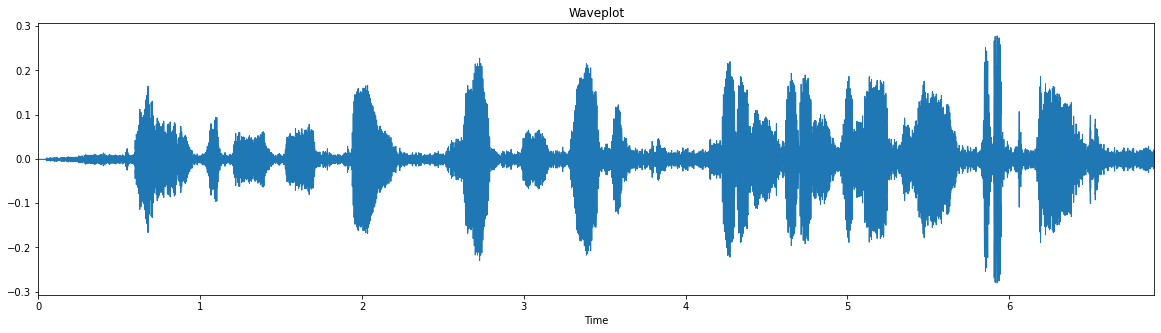

In [ ]:
x , sr = librosa.load(path)
plt.figure(figsize=(20, 5))
plt.title('Waveplot')
librosa.display.waveplot(x, sr=sr)
plt.show()

In [ ]:
signal = x

In [ ]:
type(signal)

numpy.ndarray

In [ ]:
df = pd.DataFrame({'time': range(len(signal)), 'signal': np.abs(signal)})
df.head()

,time,signal
0,0,1.480250e-06
1,1,8.166425e-07
2,2,8.349265e-07
3,3,1.863025e-06
4,4,1.049084e-06


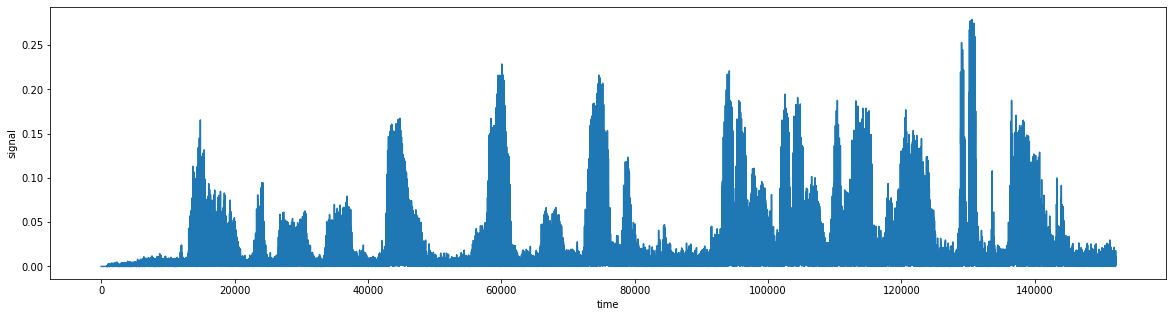

In [ ]:
plt.figure(figsize=(20, 5))
sns.lineplot(data=df, x='time', y='signal')
plt.show()

In [ ]:
df['moving_average'] = df['signal'].rolling(2000).sum()
df.tail()

,time,signal,moving_average
152140,152140,0.013584,15.335766
152141,152141,0.012803,15.339492
152142,152142,0.010701,15.341310
152143,152143,0.007272,15.339768
152144,152144,0.003394,15.334236


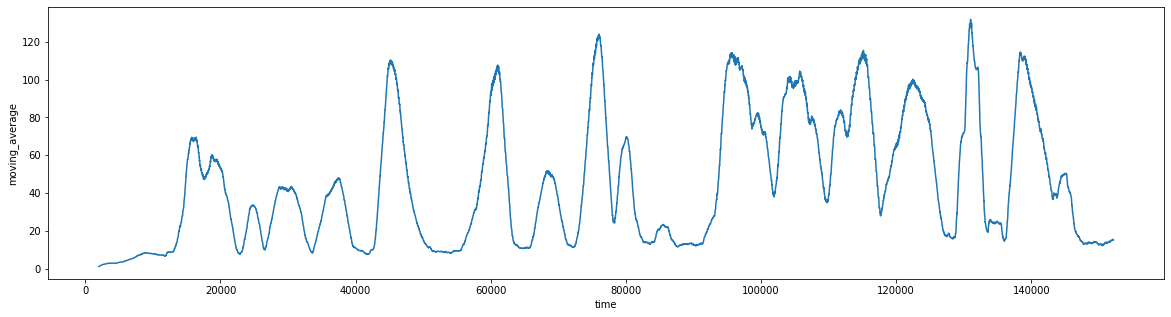

In [ ]:
plt.figure(figsize=(20, 5))
sns.lineplot(data=df, x='time', y='moving_average')
plt.show()

!pip install peakdetect

In [ ]:
import peakdetect
peaks = peakdetect.peakdetect(df['moving_average'], df['time'], delta=12)

In [ ]:
drop_df = pd.DataFrame(peaks[1])
drop_df.columns = ['time', 'signal']
drop_df

,time,signal
0,17630,47.261478
1,22885,7.536092
2,26560,9.998771
3,33582,8.413486
4,41774,7.699314
5,54094,8.253686
6,64786,10.622449
7,72180,11.230191
8,78299,24.106211
9,87620,11.477385


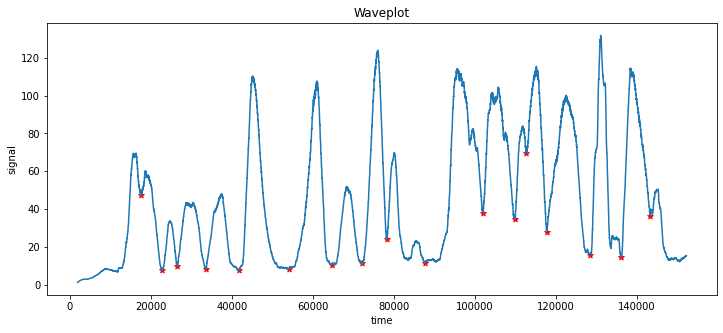

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(df['time'], df['moving_average'])
plt.scatter(drop_df['time'], drop_df['signal'], color='red', marker='*')

plt.title('Waveplot')
plt.xlabel('time')
plt.ylabel('signal')

plt.show()

In [ ]:
import os

In [ ]:
audio_path = []
for dirname, _, filenames in os.walk('/content/test/audio'):
    for filename in filenames:
        audio_path.append(os.path.join(dirname, filename))
hindi_df = pd.DataFrame({'file': audio_path[:100]})
hindi_df.head()

,file
0,/content/test/audio/3768_029.wav
1,/content/test/audio/5945_061.wav
2,/content/test/audio/1183_061.wav
3,/content/test/audio/6001_029.wav
4,/content/test/audio/2867_052.wav


In [ ]:
r = sr.Recognizer()
def speech_hindi(file):
    sample_audio = sr.AudioFile(file)
    with sample_audio as source:
        audio = r.record(source) #duration
    hindi_text = r.recognize_google(audio, language='hi-IN')
    return hindi_text

In [ ]:
hindi_df['google_transcription'] = hindi_df['file'].apply(lambda x: speech_hindi(x))
hindi_df.head()

,file,google_transcription
0,/content/test/audio/3768_029.wav,दक्षिण अफ्रीका में अपने आंदोलन की कामयाबी के बाद
1,/content/test/audio/5945_061.wav,बंगा नाम सुनते ही अलगू चौधरी का कलेजा धक धक कर...
2,/content/test/audio/1183_061.wav,सोना कपड़े धोना कुए से पानी लाना गायों
3,/content/test/audio/6001_029.wav,रामधन मिश्र बोले संजीवनी गेल को जानबूझकर मारा है
4,/content/test/audio/2867_052.wav,और घुमाया ही था कि रामचंद्र ने अंदर कदम रखा


In [ ]:
def preprocessing_num(filenum):
    filenum = str(filenum)
    if len(filenum) == 3:
        filenum = '0' + filenum
    return filenum

In [ ]:
actual_trans = pd.read_csv('/content/test/transcription.txt', sep='_', header=None)
actual_trans.columns = ['file', 'transcription']
actual_trans.head()

,file,transcription
0,116,003 और अपने पेट को माँ की स्वादिष्ट गरमगरम जले...
1,116,008 और अपने पेट को माँ की स्वादिष्ट गरमगरम जले...
2,116,025 और अपने पेट को माँ की स्वादिष्ट गरमगरम जले...
3,116,036 और अपने पेट को माँ की स्वादिष्ट गरमगरम जले...
4,116,061 और अपने पेट को माँ की स्वादिष्ट गरमगरम जले...


In [ ]:
actual_trans['file'] = actual_trans['file'].apply(lambda x: preprocessing_num(x))
actual_trans.head()

,file,transcription
0,0116,003 और अपने पेट को माँ की स्वादिष्ट गरमगरम जले...
1,0116,008 और अपने पेट को माँ की स्वादिष्ट गरमगरम जले...
2,0116,025 और अपने पेट को माँ की स्वादिष्ट गरमगरम जले...
3,0116,036 और अपने पेट को माँ की स्वादिष्ट गरमगरम जले...
4,0116,061 और अपने पेट को माँ की स्वादिष्ट गरमगरम जले...


In [ ]:
actual_trans['file'] = '/content/test/audio/' + actual_trans['file'] + '_' + actual_trans['transcription'].str[:3] + '.wav'
actual_trans.head()

,file,transcription
0,/content/test/audio/0116_003.wav,003 और अपने पेट को माँ की स्वादिष्ट गरमगरम जले...
1,/content/test/audio/0116_008.wav,008 और अपने पेट को माँ की स्वादिष्ट गरमगरम जले...
2,/content/test/audio/0116_025.wav,025 और अपने पेट को माँ की स्वादिष्ट गरमगरम जले...
3,/content/test/audio/0116_036.wav,036 और अपने पेट को माँ की स्वादिष्ट गरमगरम जले...
4,/content/test/audio/0116_061.wav,061 और अपने पेट को माँ की स्वादिष्ट गरमगरम जले...


In [ ]:
actual_trans['transcription'] = actual_trans['transcription'].str[3:]
actual_trans.head()

,file,transcription
0,/content/test/audio/0116_003.wav,और अपने पेट को माँ की स्वादिष्ट गरमगरम जलेबिय...
1,/content/test/audio/0116_008.wav,और अपने पेट को माँ की स्वादिष्ट गरमगरम जलेबिय...
2,/content/test/audio/0116_025.wav,और अपने पेट को माँ की स्वादिष्ट गरमगरम जलेबिय...
3,/content/test/audio/0116_036.wav,और अपने पेट को माँ की स्वादिष्ट गरमगरम जलेबिय...
4,/content/test/audio/0116_061.wav,और अपने पेट को माँ की स्वादिष्ट गरमगरम जलेबिय...


In [ ]:
hindi_df = pd.merge(hindi_df, actual_trans, on='file')
hindi_df.head()

,file,google_transcription,transcription
0,/content/test/audio/3768_029.wav,दक्षिण अफ्रीका में अपने आंदोलन की कामयाबी के बाद,दक्षिण अफ्रीका में अपने आंदोलन की क़ामयाबी के...
1,/content/test/audio/5945_061.wav,बंगा नाम सुनते ही अलगू चौधरी का कलेजा धक धक कर...,जुम्मन का नाम सुनते ही अलगू चौधरी का कलेजा धक...
2,/content/test/audio/1183_061.wav,सोना कपड़े धोना कुए से पानी लाना गायों,बर्तन धोना कपड़े धोना कुएँ से पानी लाना गाय और
3,/content/test/audio/6001_029.wav,रामधन मिश्र बोले संजीवनी गेल को जानबूझकर मारा है,रामधन मिश्र बोलेसमझू ने बैल को जानबूझ कर मारा है
4,/content/test/audio/2867_052.wav,और घुमाया ही था कि रामचंद्र ने अंदर कदम रखा,ओर घुमाया ही था कि रामचंद्र ने अंदर कदम रखा


In [ ]:
actual_trans.shape

(3843, 2)

In [ ]:
import tensorflow as tf

In [ ]:
tokenizer_1 = tf.keras.preprocessing.text.Tokenizer(oov_token='<OOV>')
tokenizer_1.fit_on_texts(hindi_df['transcription'].values)
sequences_1 = tokenizer_1.texts_to_sequences(hindi_df['google_transcription'].values)
sequences_2 = tokenizer_1.texts_to_sequences(hindi_df['transcription'].values)
longest_sentence = len(max(sequences_1, key=len))

In [ ]:
padseq_1 = tf.keras.preprocessing.sequence.pad_sequences(sequences_1, maxlen=longest_sentence, padding='post')
padseq_2 = tf.keras.preprocessing.sequence.pad_sequences(sequences_2, maxlen=longest_sentence, padding='post')

In [ ]:
padseq_1.shape, padseq_2.shape

((80, 17), (80, 17))

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
cosine_similarity(padseq_1, padseq_2).mean()

0.4509061955965931

In [ ]:
def create_mfcc_features(path):
    mfccs = []
    try:
        x , sr = librosa.load(path, res_type='kaiser_fast')
        mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=128)
        mfccs = np.mean(mfccs.T,axis=0)
    except:
        print('Error reading audio')
    return mfccs

In [ ]:
actual_trans.head()

,file,transcription
0,/content/test/audio/0116_003.wav,और अपने पेट को माँ की स्वादिष्ट गरमगरम जलेबिय...
1,/content/test/audio/0116_008.wav,और अपने पेट को माँ की स्वादिष्ट गरमगरम जलेबिय...
2,/content/test/audio/0116_025.wav,और अपने पेट को माँ की स्वादिष्ट गरमगरम जलेबिय...
3,/content/test/audio/0116_036.wav,और अपने पेट को माँ की स्वादिष्ट गरमगरम जलेबिय...
4,/content/test/audio/0116_061.wav,और अपने पेट को माँ की स्वादिष्ट गरमगरम जलेबिय...


In [ ]:
actual_trans.shape

(3843, 2)

In [ ]:
len(audio_path)

3843

In [ ]:
%time
X_df = pd.DataFrame(actual_trans['file'].apply(lambda x: create_mfcc_features(x)).tolist())
X_df.head()

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 11.4 µs


,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-418.114319,206.324081,-6.671517,1.565968,19.935564,-24.480442,-6.908082,10.495051,-17.127350,-10.693458,...,-0.281305,-0.490741,-0.621746,-0.650753,-0.723632,-0.587757,-0.196129,0.027844,0.117751,0.182080
1,-517.921326,171.383316,-18.712564,4.379705,28.568960,-22.074461,-17.890360,1.307760,-13.600409,-10.768128,...,0.018783,-0.373742,-0.460082,-0.124459,0.136063,-0.076839,-0.202929,0.137892,0.104232,-0.259012
2,-325.142822,158.954208,-29.199663,-9.255455,14.469748,-18.139336,-2.104358,1.164224,-21.142530,-2.177845,...,0.094056,-0.380325,-0.284834,0.087340,-0.227515,-0.142452,0.363915,0.076606,-0.089098,0.294501
3,-305.683075,170.945450,-8.844166,6.864938,9.520580,-42.871124,-18.625910,6.542658,-20.108166,-17.899918,...,0.026710,-0.151353,-0.411130,-0.162376,0.231918,0.086397,-0.054785,0.161405,0.024303,-0.288821
4,-386.769958,154.295486,-0.486231,9.799503,10.976097,-37.431774,-23.857941,-2.611188,-15.296546,-7.856586,...,0.174186,0.051819,-0.083728,-0.028140,0.090553,0.068910,0.000950,-0.136089,-0.231669,-0.133903


In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(actual_trans['transcription'].values)
sequences = tokenizer.texts_to_sequences(actual_trans['transcription'].values)
longest_sentence = len(max(sequences, key=len))
padseq = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=longest_sentence, padding='post')
padseq[:10]

array([[  3,  21, 711,   8, 223,   4, 712, 713, 714, 715,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  3,  21, 711,   8, 223,   4, 712, 713, 714, 715,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  3,  21, 711,   8, 223,   4, 712, 713, 714, 715,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  3,  21, 711,   8, 223,   4, 712, 713, 714, 715,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  3,  21, 711,   8, 223,   4, 712, 713, 714, 715,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  3,  21, 711,   8, 223,   4, 712, 713, 714, 715,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  3,  21, 711,   8, 223,   4, 712, 713, 714, 715,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  3,  21, 711,   8, 223,   4, 712, 713, 714, 715,   0,   0,   0,
   

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(np.array(X_df), padseq, test_size=0.10)

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 16, 8, 1)
x_val = x_val.reshape(x_val.shape[0], 16, 8, 1)

In [ ]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(16, 8, 1)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding = "same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding = "same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(longest_sentence, activation='softmax')
])
model.summary()